### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [133]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [134]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [135]:
initial_data.shape[0] == processed_data.shape[0]

True

In [136]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [137]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [138]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [139]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

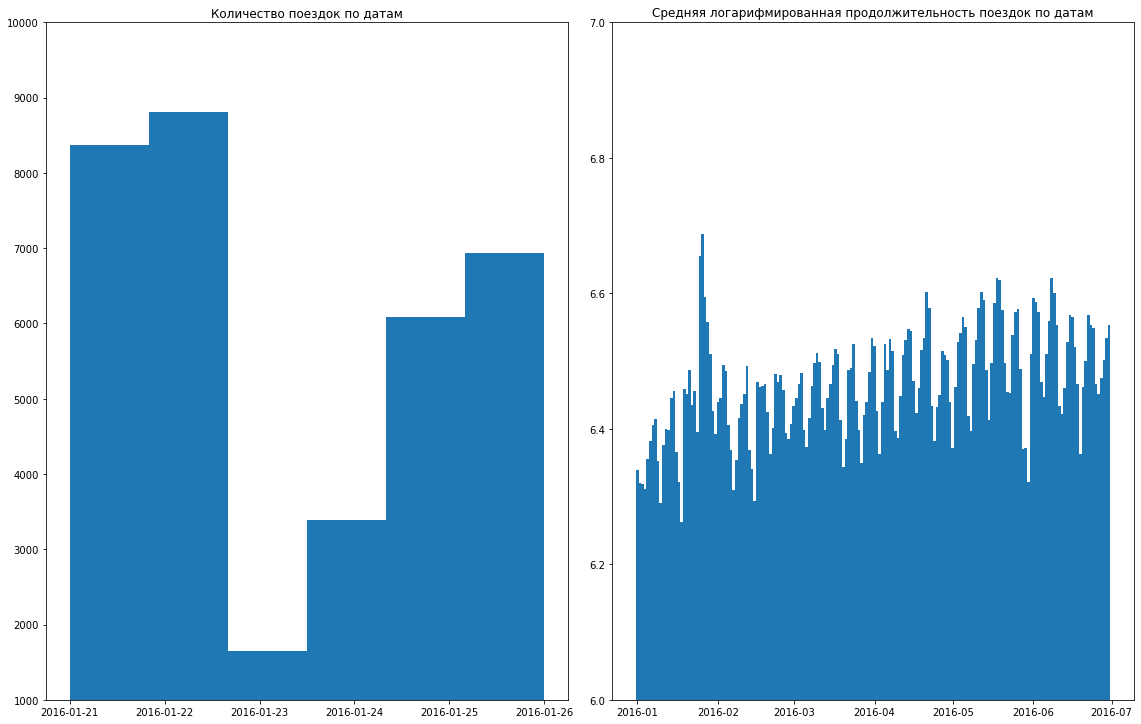

In [140]:
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

f_processed_data = processed_data[(processed_data['date'] > datetime.date(2016,1,20)) & (processed_data['date'] < datetime.date(2016,1,27))]

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(f_processed_data['date'], bins=f_processed_data.date.unique().shape[0])
plt.ylim((1000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


In [141]:
import datetime

processed_data[processed_data['date'] == datetime.date(2016,1,25)]

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id1610798,1,930.399753,0,1.726843,6.432940,2016-01-25 23:32:14,2016-01-25,0,23,1
id1256619,0,930.399753,0,2.116475,6.484635,2016-01-25 03:24:46,2016-01-25,0,3,1
id3783123,1,1070.232174,0,7.540004,7.362645,2016-01-25 17:06:05,2016-01-25,0,17,1
id3499387,0,930.399753,0,0.000000,6.364751,2016-01-25 19:45:12,2016-01-25,0,19,1
id2022146,1,930.399753,0,6.944082,6.770789,2016-01-25 17:51:57,2016-01-25,0,17,1
...,...,...,...,...,...,...,...,...,...,...
id2686509,1,930.399753,0,2.882947,7.199678,2016-01-25 07:32:53,2016-01-25,0,7,1
id0847908,1,930.399753,0,3.873882,6.986566,2016-01-25 20:49:02,2016-01-25,0,20,1
id1975043,1,930.399753,0,1.248822,7.316548,2016-01-25 14:53:36,2016-01-25,0,14,1


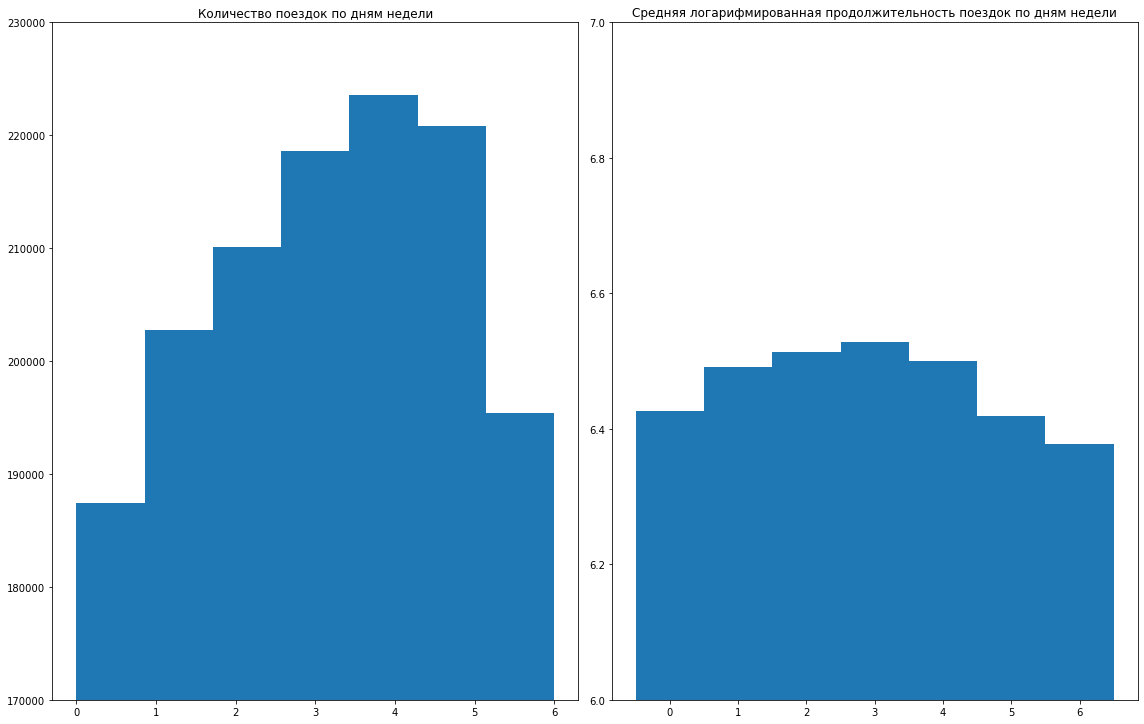

In [142]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['day_of_week'], bins=processed_data.day_of_week.unique().shape[0])
plt.ylim((170000, 230000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['day_of_week'].unique())), 
        processed_data.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по дням недели')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по дням недели')

plt.show()




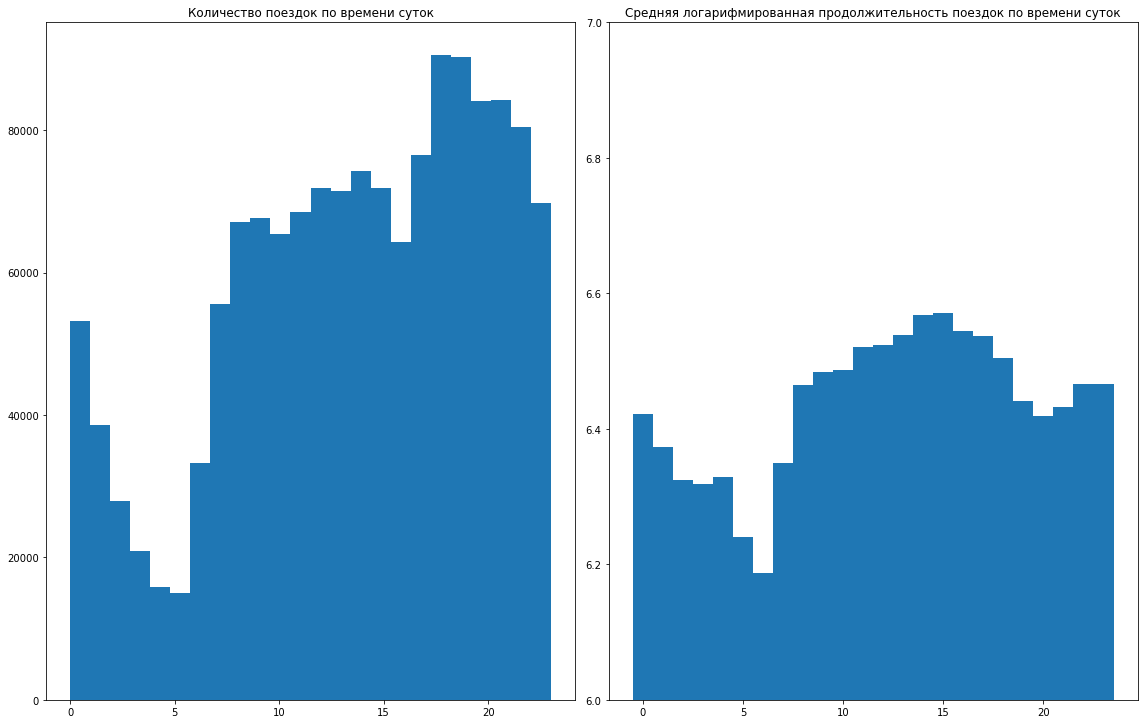

In [143]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['hour'], bins=processed_data.hour.unique().shape[0])
# plt.ylim((170000, 230000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['hour'].unique())), 
        processed_data.groupby('hour', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по времени суток')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по времени суток')

plt.show()


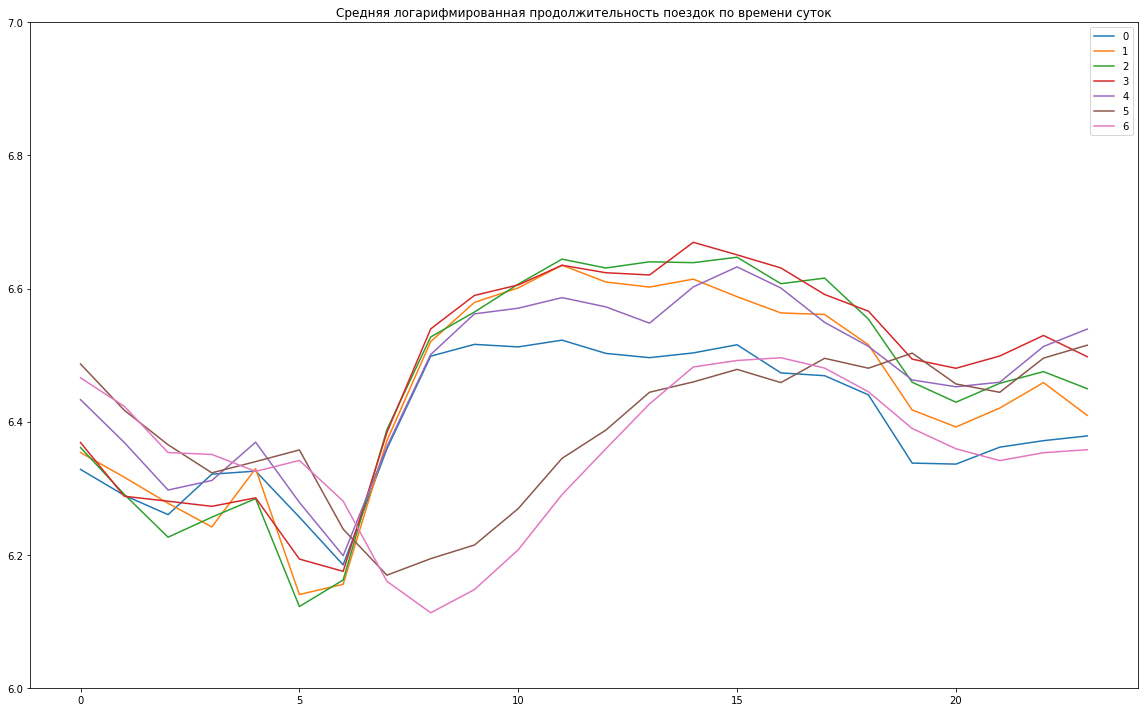

In [144]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_2 = fig.add_subplot()

legend = []

for d in np.sort(processed_data.day_of_week.unique()):
    day_processed_data = processed_data[processed_data['day_of_week'] == d]
    
    plt.plot(sorted(list(day_processed_data['hour'].unique())), 
            day_processed_data.groupby('hour', as_index=False)['log_trip_duration'].mean()['log_trip_duration'])
    plt.ylim((6, 7))
    
    legend.append(d)

ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по времени суток')
    
plt.legend(legend)
    
fig.tight_layout()

plt.show()


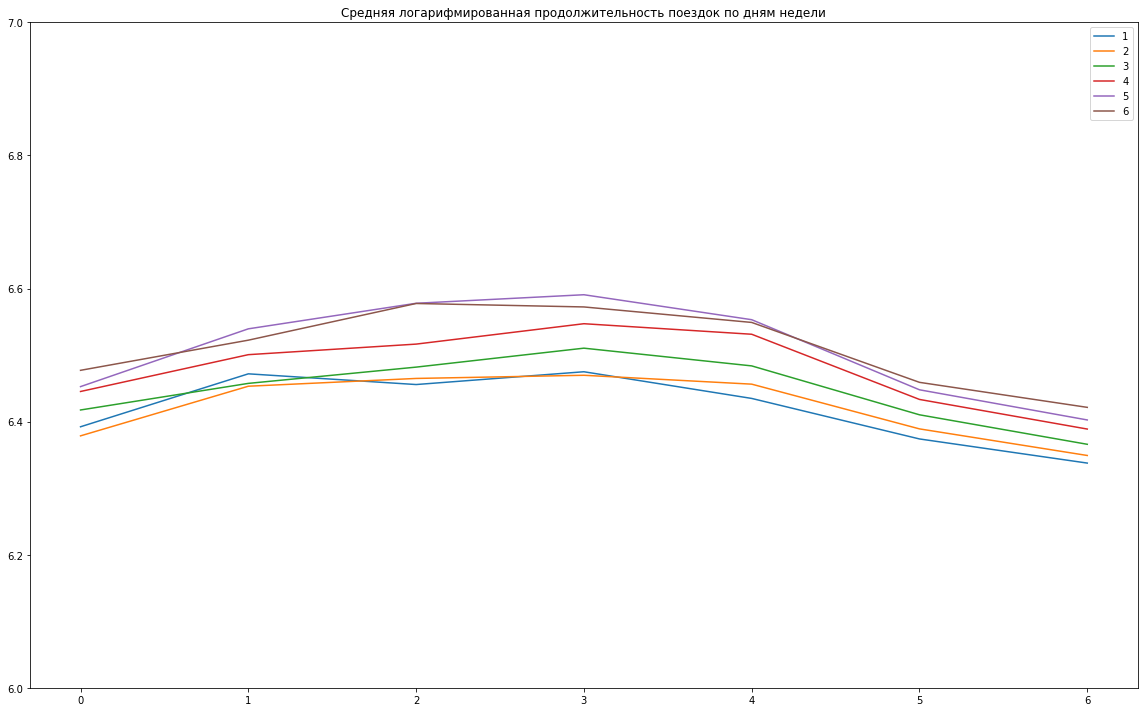

In [145]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_2 = fig.add_subplot()

legend = []

for m in np.sort(processed_data.month.unique()):
    month_processed_data = processed_data[processed_data['month'] == m]
    
    plt.plot(sorted(list(month_processed_data['day_of_week'].unique())), 
            month_processed_data.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()['log_trip_duration'])
    plt.ylim((6, 7))
    
    legend.append(m)

ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по дням недели')
    
plt.legend(legend)
    
fig.tight_layout()

plt.show()

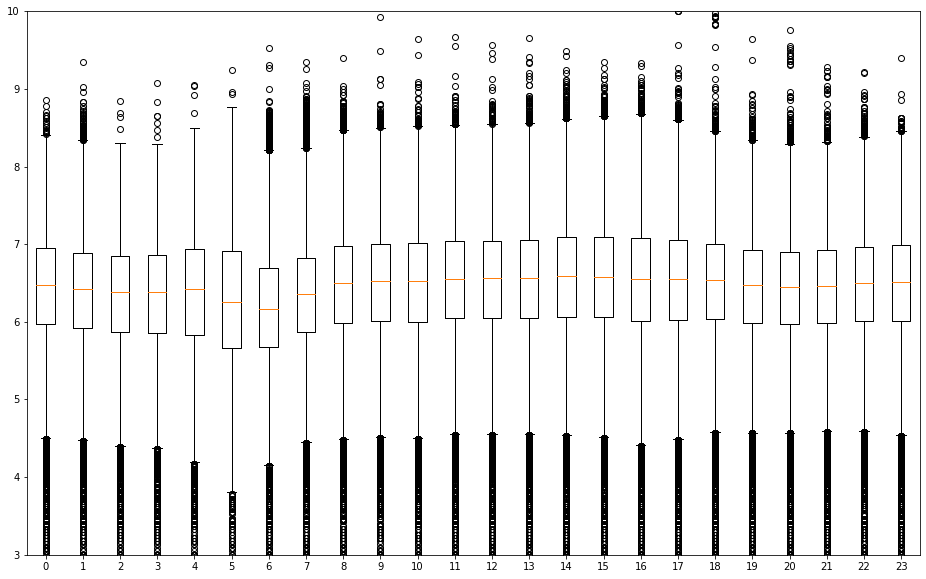

In [146]:
boxplot_data = []

for h in np.sort(processed_data['hour'].unique()):
    boxplot_data.append((h, processed_data[processed_data['hour']==h]['log_trip_duration']))
    
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.boxplot([v for  k,v in boxplot_data],
            labels=[k for  k,v in boxplot_data])

plt.ylim((3, 10))

plt.show()

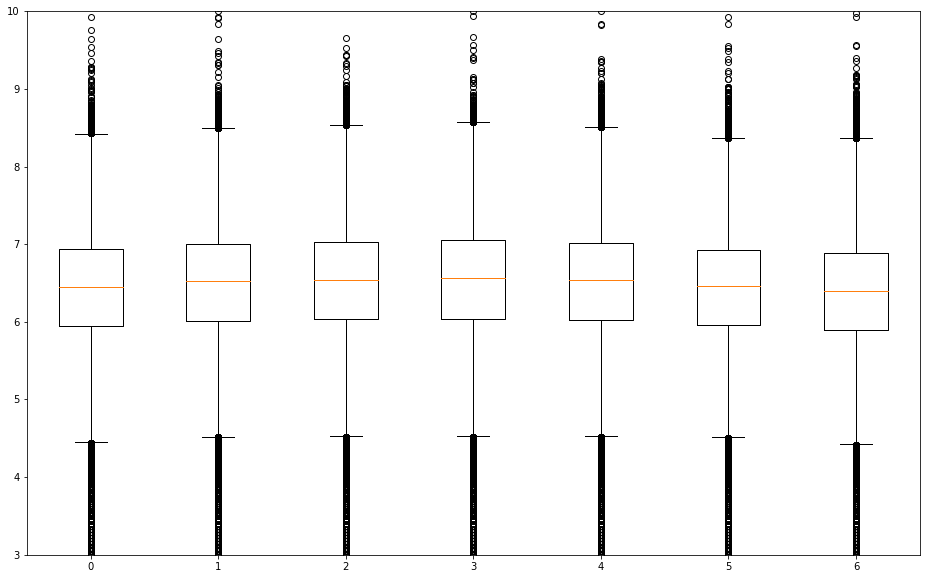

In [147]:
boxplot_data = []

for h in np.sort(processed_data['day_of_week'].unique()):
    boxplot_data.append((h, processed_data[processed_data['day_of_week']==h]['log_trip_duration']))
    
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.boxplot([v for  k,v in boxplot_data],
            labels=[k for  k,v in boxplot_data])

plt.ylim((3, 10))

plt.show()

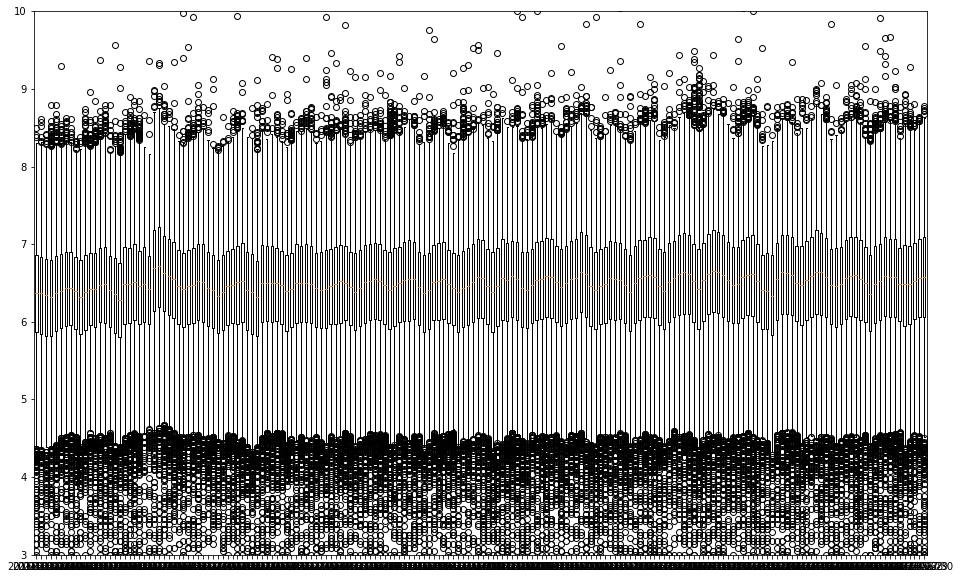

In [148]:
boxplot_data = []

for h in np.sort(processed_data['date'].unique()):
    boxplot_data.append((h, processed_data[processed_data['date']==h]['log_trip_duration']))
    
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.boxplot([v for  k,v in boxplot_data],
            labels=[k for  k,v in boxplot_data])

plt.ylim((3, 10))

plt.show()

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [149]:
### Создадим первый бинарный признак
processed_data['anomaly'] = 0 
processed_data.loc[processed_data.date == datetime.date(2016,1,23), 'anomaly'] = 1 


In [150]:
### Создадим второй бинарный признак
processed_data['traffic_jam'] = 0

t_j = processed_data.reset_index().groupby(['day_of_week', 'hour'])['log_trip_duration'].mean().reset_index().sort_values(['log_trip_duration'], ascending=False).iloc[:10][['day_of_week', 'hour']].values
for d, h in t_j:
    processed_data.loc[(processed_data['day_of_week'] == d) & (processed_data['hour'] == h), 'traffic_jam'] = 1

In [151]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


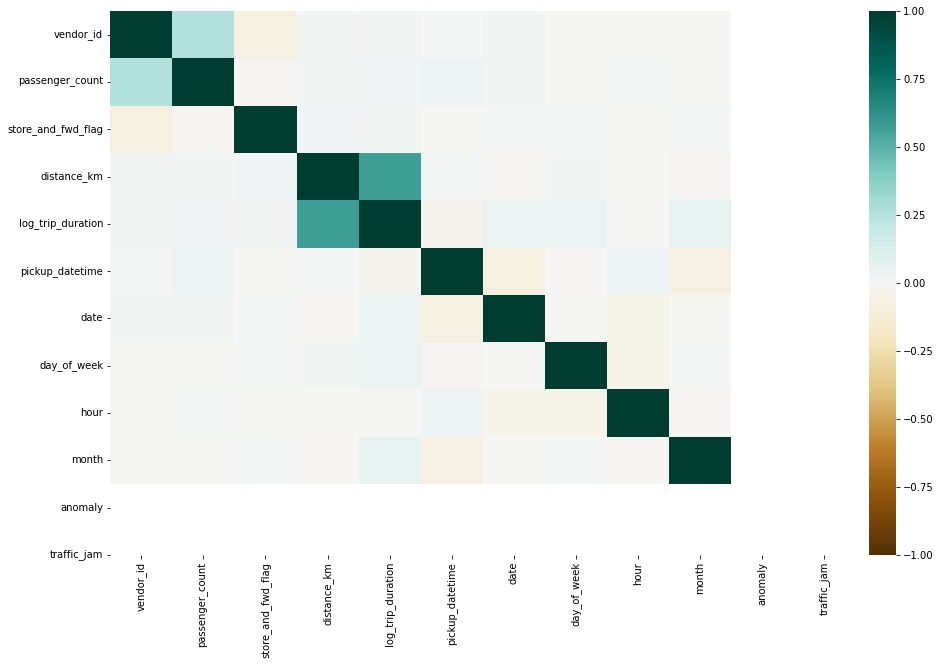

In [152]:
import seaborn as sns 

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.heatmap(processed_data.corr(),
            xticklabels=processed_data.columns,
            yticklabels=processed_data.columns,
            cmap='BrBG',
            vmin=-1,
            vmax=+1)

plt.show()

Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [153]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [154]:
### Делаем OneHotEncoding и конкатим с processed_data

for col in ['day_of_week', 'hour', 'month']:    
    processed_data = pd.concat((processed_data, pd.get_dummies(processed_data[col],prefix=col,drop_first=True)), axis=1)
    processed_data = processed_data.drop([col], axis=1)
   


In [156]:
processed_data.head(5).to_csv('task_2.csv',sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [157]:
processed_data.corr()



,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
vendor_id,1.000000,0.258422,-0.079872,0.008107,0.019720,-0.000024,-0.003243,0.001714,-0.001434,-0.001472,...,0.002987,0.002782,0.003261,0.002912,0.000963,0.002273,0.001183,-0.002483,-0.002088,-0.003400
passenger_count,0.258422,1.000000,-0.018487,0.016596,0.027069,0.000774,-0.007711,-0.014537,-0.015004,-0.013064,...,0.003088,0.004305,0.009194,0.012457,0.010515,-0.002469,-0.001571,0.001571,0.001276,-0.000935
store_and_fwd_flag,-0.079872,-0.018487,1.000000,0.026275,0.015326,-0.000300,0.006137,-0.000167,0.000923,0.002295,...,0.000074,-0.002291,-0.003625,-0.000768,-0.000689,-0.000308,-0.002311,0.000418,-0.001071,0.002008
distance_km,0.008107,0.016596,0.026275,1.000000,0.573899,-0.002175,-0.010980,-0.008903,-0.009157,-0.001970,...,-0.019128,0.001146,0.010074,0.017711,0.028661,-0.011722,-0.001092,-0.000656,0.011662,0.008024
log_trip_duration,0.019720,0.027069,0.015326,0.573899,1.000000,-0.000464,0.060203,0.012423,0.024068,0.032476,...,-0.008300,-0.014940,-0.010723,-0.000028,-0.000160,-0.024576,-0.009166,0.008191,0.022845,0.027698
anomaly,-0.000024,0.000774,-0.000300,-0.002175,-0.000464,1.000000,-0.009163,-0.013513,-0.013798,-0.014120,...,-0.008640,-0.008230,-0.008323,-0.008128,-0.007539,-0.014862,-0.015524,-0.015356,-0.015240,-0.014713
traffic_jam,-0.003243,-0.007711,0.006137,-0.010980,0.060203,-0.009163,1.000000,-0.033208,0.201225,0.189672,...,-0.069990,-0.067377,-0.067425,-0.065841,-0.061069,-0.002765,0.008730,-0.008795,-0.009837,0.014400
day_of_week_1,0.001714,-0.014537,-0.000167,-0.008903,0.012423,-0.013513,-0.033208,1.000000,-0.164838,-0.168686,...,0.004040,0.008845,0.008425,0.002732,-0.009694,-0.010813,0.019297,-0.012799,0.025496,-0.010948
day_of_week_2,-0.001434,-0.015004,0.000923,-0.009157,0.024068,-0.013798,0.201225,-0.164838,1.000000,-0.172239,...,0.005533,0.008975,0.010968,0.006935,-0.002913,-0.008281,0.020738,-0.016528,-0.016388,0.030087
day_of_week_3,-0.001472,-0.013064,0.002295,-0.001970,0.032476,-0.014120,0.189672,-0.168686,-0.172239,1.000000,...,0.004253,0.008539,0.012817,0.011461,0.011320,-0.005204,0.020337,-0.018018,-0.016549,0.030393


In [158]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [159]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

from sklearn.linear_model import LinearRegression

x = processed_data.drop(['log_trip_duration'], axis=1)
y = processed_data['log_trip_duration']

model = LinearRegression()

from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(x, y)

sfs.get_feature_names_out()


AttributeError: 'SequentialFeatureSelector' object has no attribute 'get_feature_names_out'

In [165]:
### Перечислите фичи, которые окажутся наиболее желанными
sfs.get_support()


array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [175]:
X = x[x.columns[sfs.get_support()]]
Y = y

X

,distance_km,traffic_jam,day_of_week_6,hour_5,hour_6
id,,,,,
id2875421,1.500479,0,0,0,0
id2377394,1.807119,0,1,0,0
id3858529,6.392080,1,0,0,0
id3504673,1.487155,0,0,0,0
id2181028,1.189925,0,0,0,0
...,...,...,...,...,...
id2376096,1.226296,0,0,0,0
id1049543,6.056935,0,1,0,0
id2304944,7.832952,0,0,0,1


In [174]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?
model = LinearRegression()
model.fit(X,Y)
predictions = model.predict(X)
    
np.mean((predictions - Y)**2)



0.4154000234078043